# Adaptive Solver

Short demonstration of the genreralized adaptive solver from:  
"A feasible approach for automatically differentiable unitary coupled-cluster on quantum computers"  
[doi.org/10.1039/D0SC06627C](https://doi.org/10.1039/D0SC06627C) for more details. 

<img src="pics/adaptive_general.png" alt="Drawing" style="width: 400px;"/>

We also recommend to look at the original works on adaptive solvers by [Grimsley](https://doi.org/10.1038/s41467-019-10988-2) and [Ryabinkin](https://doi.org/10.1021/acs.jctc.8b00932):

Currently you need to checkout the `devel` branch of tequila in order for this notebook to run!

In order to display the circuits in this tutorial you need to have `qpic` installed.  
`pip install qpic`  

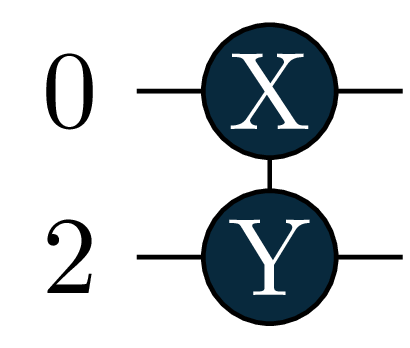

In [14]:
import tequila as tq
import numpy
from IPython.display import Image

def show(circuit, name=None, *args, **kwargs):
    tq.circuit.export_to(circuit, "{}.png".format(name), *args, **kwargs)
    return Image("{}.png".format(name), *args, **kwargs)

show(tq.gates.ExpPauli(paulistring="X(0)Y(2)", angle=1.0), width=100)

Note that circuits will be represented by their generator in primitive Pauli Rotations so the picture above repreents $e^{-i\frac{\theta}{2} \sigma_x(0) \sigma_y(2)}$ 

In [2]:
# failsafe
try:
    test = tq.adapt
except:
    print("It seems you have the wrong version of tequila checked out. Please check out the `devel` branch. Or re-install with\npip install git+https://github.com/aspuru-guzik-group/tequila/tree/devel.git")

## A one-qubit example

In [16]:
H = tq.paulis.X(0)
Upre = tq.gates.X(0)
Upost = tq.gates.Y(0)
generators = [tq.paulis.Y(0), tq.paulis.Z(0), tq.paulis.X(0)]
operator_pool = tq.adapt.AdaptPoolBase(generators=generators)
solver = tq.adapt.Adapt(H=H, operator_pool=operator_pool, Upre=Upre, UPost=Upost)
result = solver()

Starting Adaptive Solver
optimizer_args                 : {'method': 'bfgs'}
compile_args                   : {}
maxiter                        : 100
energy_convergence             : None
gradient_convergence           : 0.01
max_gradient_convergence       : 0.0
degeneracy_threshold           : 0.0001
operator pool:                 : AdaptPoolBase with 3 Generators
objective factory :            : ObjectiveFactoryBase

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 2 expectationvalues

active variables : 1

E=+0.00000000  angles= {('0', (0, 0)): 0.0}  samples= None
E=-0.84147098  angles= {('0', (0, 0)): 1.0}  samples= None
E=-0.82276010  angles= {('0', (0, 0)): 2.1753425112234144}  samples= None
E=-0.99999951  angles= {('0', (0, 0)): 1.5698029380800227}  samples= None

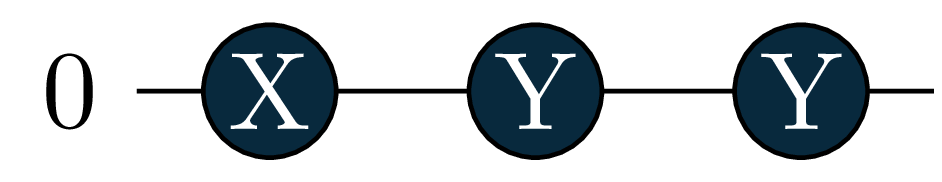

In [17]:
final_circuit = Upre + result.U + Upost
show(final_circuit, width=200)

## A Molecular Ground State

Starting Adaptive Solver
optimizer_args                 : {'method': 'bfgs'}
compile_args                   : {}
maxiter                        : 100
energy_convergence             : None
gradient_convergence           : 0.01
max_gradient_convergence       : 0.0
degeneracy_threshold           : 0.0001
operator pool:                 : MolecularPool with 3 Generators
objective factory :            : ObjectiveFactoryBase

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 2 expectationvalues

active variables : 1

E=-2.85516043  angles= {(((0, 2), (1, 3)), (0, 0)): 0.0}  samples= None
E=-2.86211064  angles= {(((0, 2), (1, 3)), (0, 0)): 0.22767215967178345}  samples= None
E=-2.87001868  angles= {(((0, 2), (1, 3)), (0, 0)): 0.1435441028152768}  samples= None
E=-2.87014572  ang

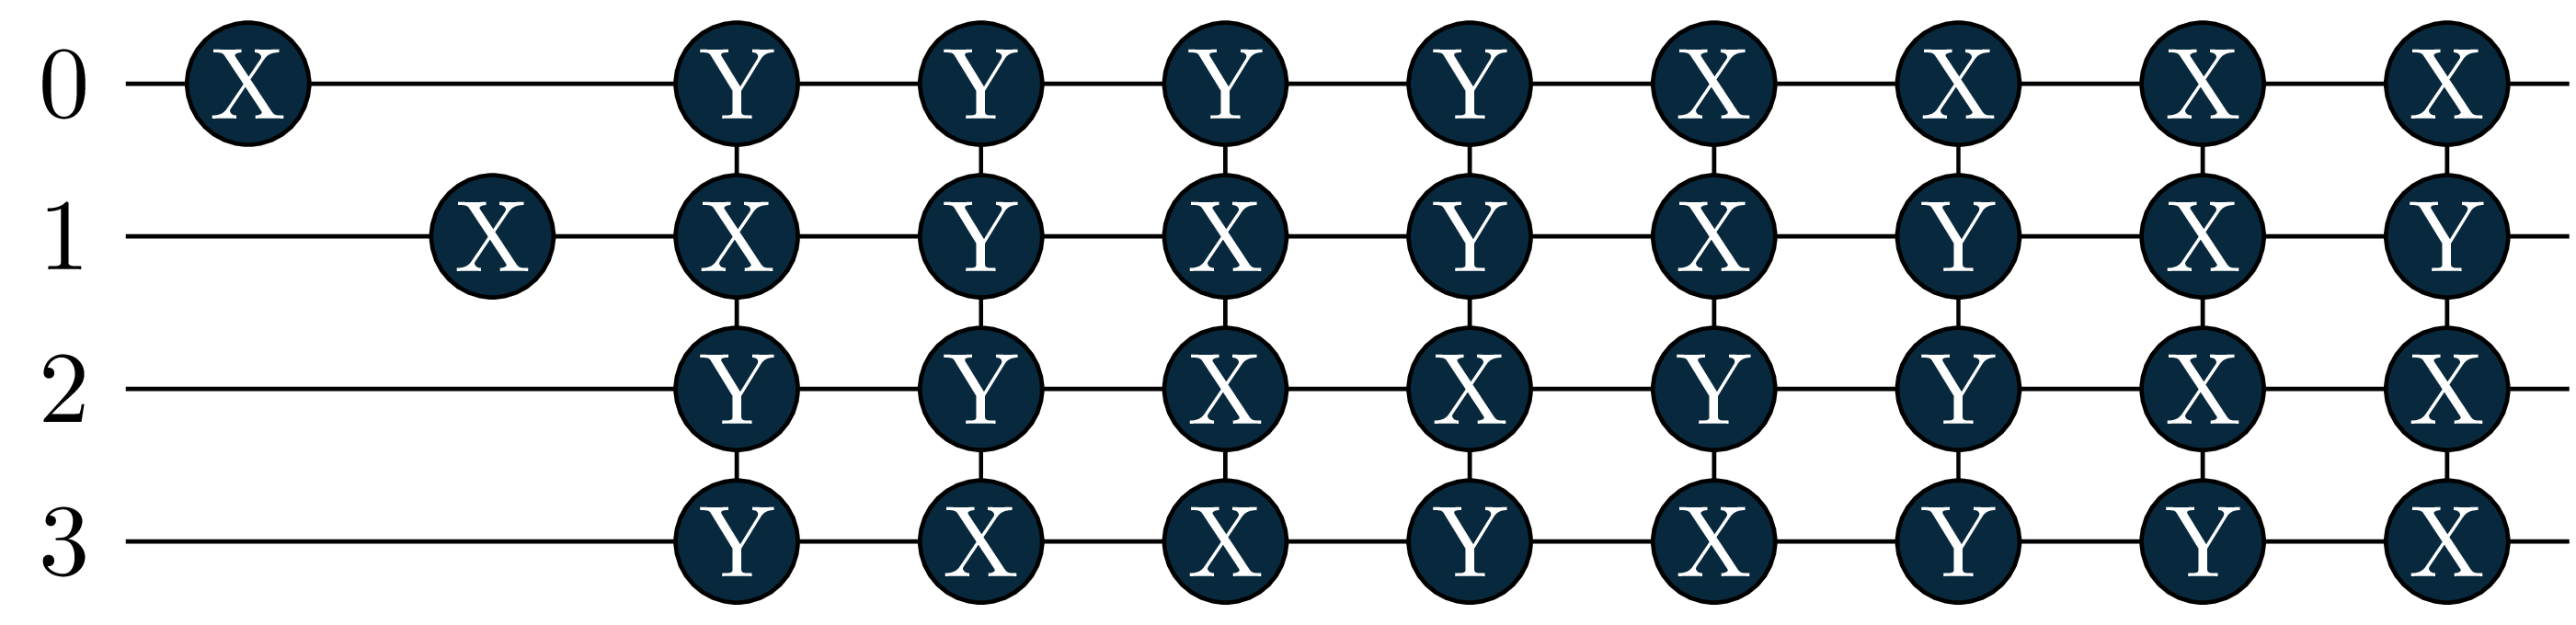

In [5]:
mol = tq.Molecule(geometry="He 0.0 0.0 0.0", basis_set="6-31G")
operator_pool = tq.adapt.MolecularPool(molecule=mol, indices="UpCCSD")
solver = tq.adapt.Adapt(H=mol.make_hamiltonian(), Upre=mol.prepare_reference(), operator_pool=operator_pool)
result = solver(operator_pool=operator_pool, label=0)
final_circuit = mol.prepare_reference() + result.U
show(final_circuit)

## The Same Ground State with fixed Post circuit

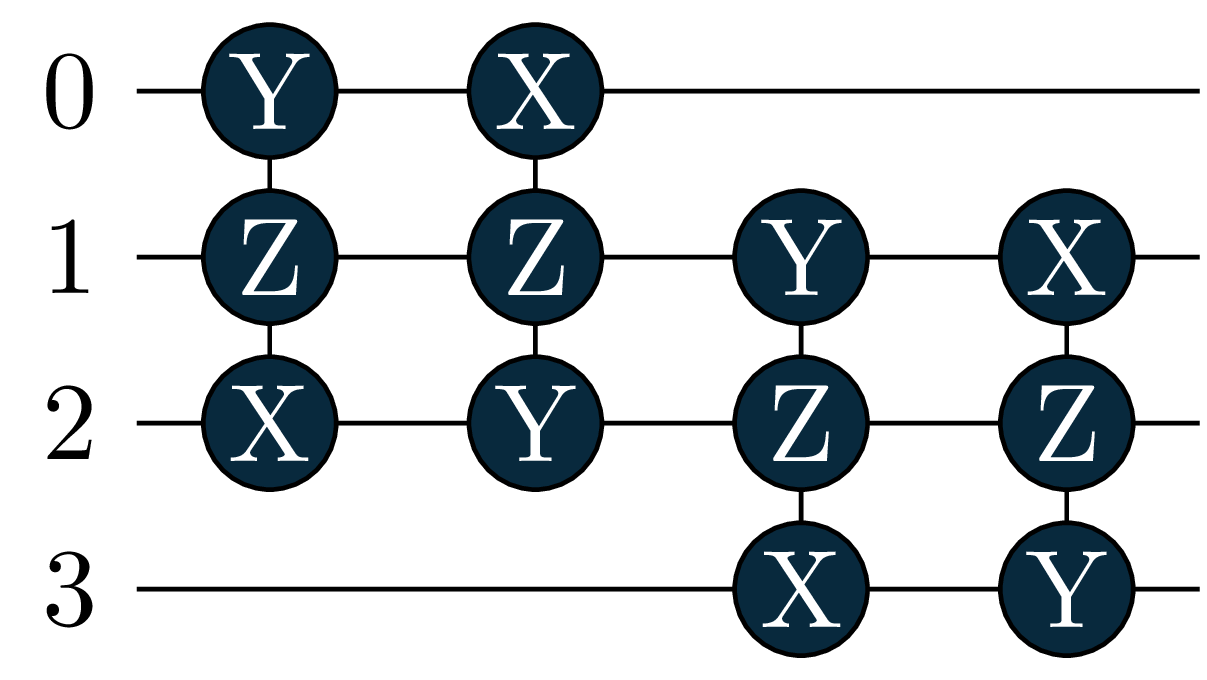

In [19]:
mol = tq.Molecule(geometry="He 0.0 0.0 0.0", basis_set="6-31G")
Upost = mol.make_excitation_gate(angle="a", indices=[(0,2)])
Upost += mol.make_excitation_gate(angle="a", indices=[(1,3)])
show(Upost, width=300)

This Post circuit that we added are single electron excitations that are not all-too important to the Helium ground state, so that the adaptive solver did not include them before. 
As a Pre circuit we will use the Hartree-Fock reference as before.

Note, that we will optimize the parameters "a".  
You can keep them static by passing for example `static_variables={"a":1.0}`.

The default starting value is 0.0, you can change that by passing `variables={"a":1.0}`

Starting Adaptive Solver
optimizer_args                 : {'method': 'bfgs'}
compile_args                   : {}
maxiter                        : 100
energy_convergence             : None
gradient_convergence           : 0.01
max_gradient_convergence       : 0.0
degeneracy_threshold           : 0.0001
operator pool:                 : MolecularPool with 3 Generators
objective factory :            : ObjectiveFactoryBase

detected degeneracies: increasing batch size temporarily from 1 to 2
Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 8 expectationvalues

active variables : 3

E=-1.89235552  angles= {a: 1.0, (((0, 2),), (0, 0)): 0.0, (((1, 3),), (0, 0)): 0.0}  samples= None
E=-2.79595210  angles= {a: 0.17533843395131954, (((0, 2),), (0, 0)): -0.41233075405682384, (((1, 

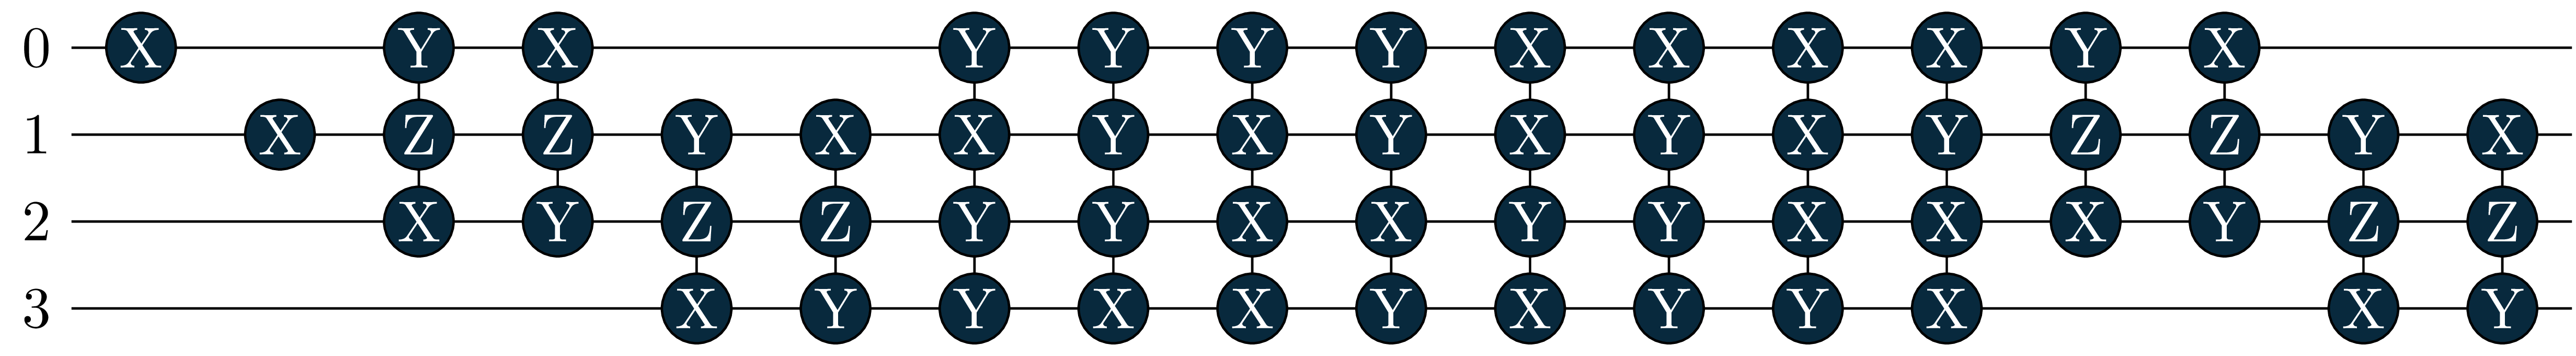

In [7]:
operator_pool = tq.adapt.MolecularPool(molecule=mol, indices="UpCCSD")
solver = tq.adapt.Adapt(H=mol.make_hamiltonian(), Upre=mol.prepare_reference(), Upost=Upost, operator_pool=operator_pool)
result = solver(operator_pool=operator_pool, label=0, static_variables=None, variables={"a":1.0})
final_circuit = mol.prepare_reference() + result.U + Upost
show(final_circuit)

## Molecular Ground and Excited States

In [8]:
mol = tq.Molecule(geometry="He 0.0 0.0 0.0", basis_set="6-31G")
operator_pool = tq.adapt.MolecularPool(molecule=mol, indices="UpCCSD")


circuits = []
variables = {}
for state in range(3):
    Upre = mol.prepare_reference()
    operator_pool = tq.adapt.MolecularPool(molecule=mol, indices="UpCCSD")
    objective_factory = tq.adapt.ObjectiveFactorySequentialExcitedState(Upre=mol.prepare_reference(), H=mol.make_hamiltonian(), circuits=circuits, factors=[100.0]*len(circuits))
    solver = tq.adapt.Adapt(objective_factory=objective_factory,
                                   Upre=mol.prepare_reference(),
                                   operator_pool=operator_pool)
    result = solver(operator_pool=operator_pool, label=state, static_variables=variables)
    U = Upre + result.U
    circuits.append(U)
    variables = {**variables, **result.variables}

Starting Adaptive Solver
optimizer_args                 : {'method': 'bfgs'}
compile_args                   : {}
maxiter                        : 100
energy_convergence             : None
gradient_convergence           : 0.01
max_gradient_convergence       : 0.0
degeneracy_threshold           : 0.0001
operator pool:                 : MolecularPool with 3 Generators
objective factory :            : ObjectiveFactorySequentialExcitedState

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 2 expectationvalues

active variables : 1

E=-2.85516043  angles= {(((0, 2), (1, 3)), (0, 0)): 0.0}  samples= None
E=-2.86211064  angles= {(((0, 2), (1, 3)), (0, 0)): 0.22767215967178345}  samples= None
E=-2.87001868  angles= {(((0, 2), (1, 3)), (0, 0)): 0.1435441028152768}  samples= None


pool gradient norm is +0.00026910, convergence criterion met
Starting Adaptive Solver
optimizer_args                 : {'method': 'bfgs'}
compile_args                   : {}
maxiter                        : 100
energy_convergence             : None
gradient_convergence           : 0.01
max_gradient_convergence       : 0.0
degeneracy_threshold           : 0.0001
operator pool:                 : MolecularPool with 3 Generators
objective factory :            : ObjectiveFactorySequentialExcitedState

Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 3 expectationvalues
gradient        : 9 expectationvalues

active variables : 1

E=+96.71492004  angles= {(((0, 2), (1, 3)), (0, 2)): 0.0, (((0, 2), (1, 3)), (0, 0)): 0.1314286602522624, (((0, 2), (1, 3)), (0, 1)): -4.628823402366113, (((0, 2),), (1, 1)): 1.534075965

In [9]:
H = mol.make_hamiltonian()
for U in circuits:
    energy = tq.simulate(tq.ExpectationValue(H=H, U=U), variables=variables)
    wfn = tq.simulate(U, variables=variables)
    print("energy = {:+2.4f}, wfn=".format(energy), wfn)

energy = -2.8701, wfn= +0.9978|1100> -0.0657|0011> 
energy = -0.9487, wfn= +0.0036|1100> -0.7060|0110> +0.7060|1001> +0.0555|0011> 
energy = +0.6086, wfn= +0.0656|1100> +0.0393|0110> -0.0393|1001> +0.9963|0011> 


Lets diagonalize the Hamiltonion with numpy and check if we really found eigenstates
We will only display states that have overlap with out reference wavefunctio ($\lvert110000....0\rangle = \lvert 2^{N_q -1} + 2^{N_q -2} \rangle$)  
in order to not have too many output here

In [10]:
eigenvalues, eigenvectors = numpy.linalg.eigh(H.to_matrix())
n_qubits = H.n_qubits
reference_basis_state = 2**(n_qubits-1) + 2**(n_qubits-2)
print("total states: {}".format(len(eigenvalues)))
print("states of interest:")
for i in range(len(eigenvalues)):
    if not numpy.isclose(eigenvectors[:,i][reference_basis_state], 0.0, atol=1.e-4):
        print("energy = {:2.4f}, wfn = ".format(eigenvalues[i]), tq.QubitWaveFunction(eigenvectors[:,i]))

total states: 16
states of interest:
energy = -2.8702, wfn =  -0.0657|0011> +0.0021|0110> -0.0021|1001> +0.9978|1100> 
energy = -0.9487, wfn =  +0.0550|0011> -0.7060|0110> +0.7060|1001> +0.0065|1100> 
energy = 0.6086, wfn =  -0.9963|0011> -0.0391|0110> +0.0391|1001> -0.0655|1100> 


Let's also look at the circuits:
The singles became more important in the excited states.

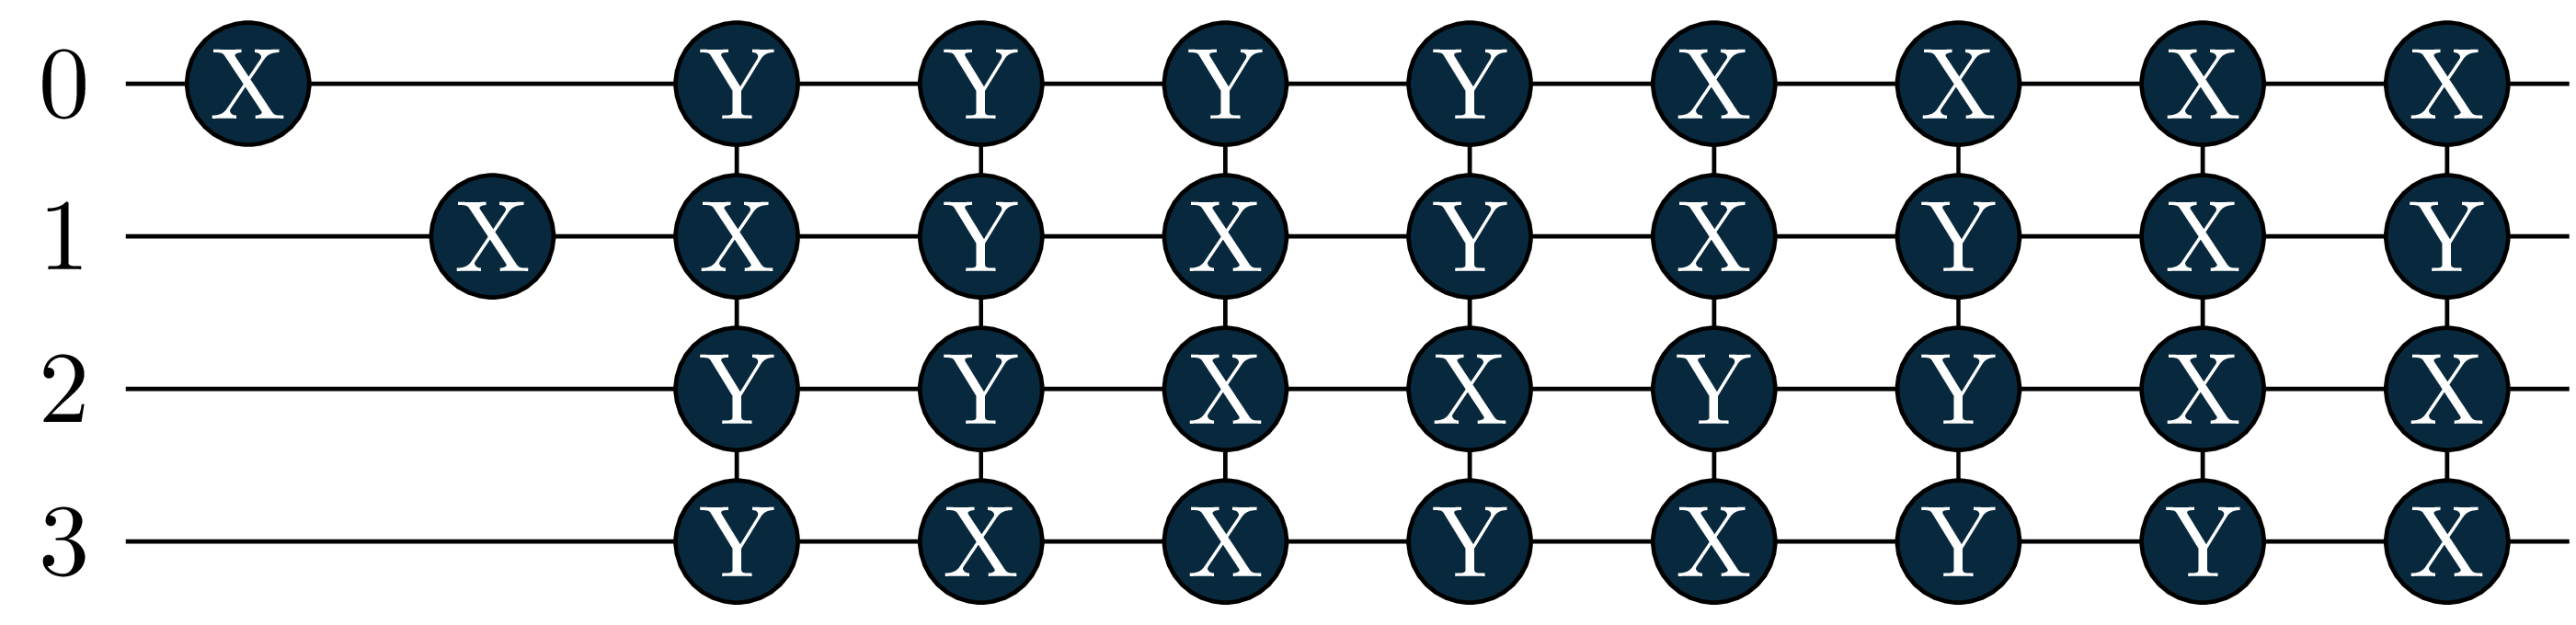

In [11]:
show(circuits[0])

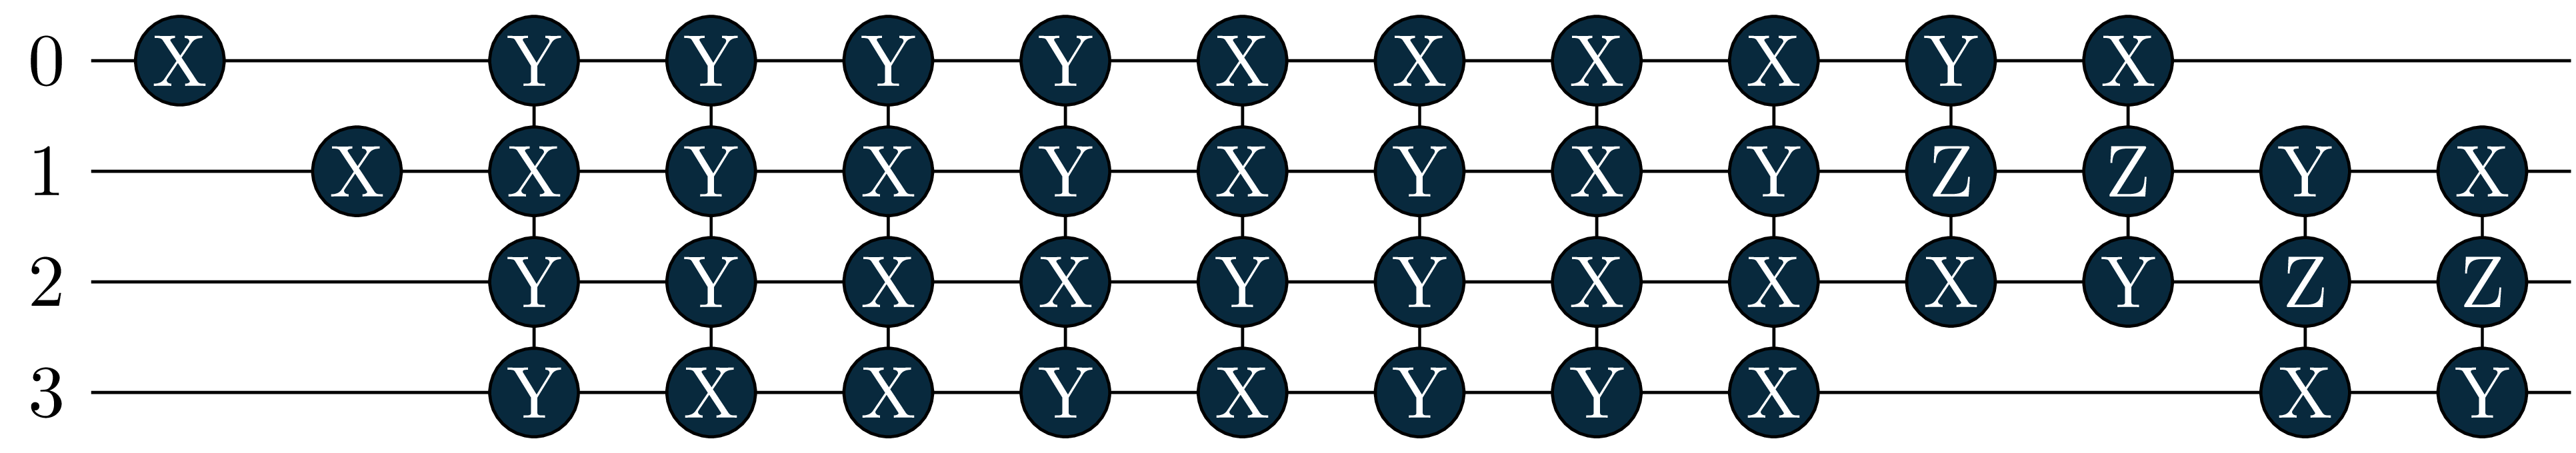

In [12]:
show(circuits[1])

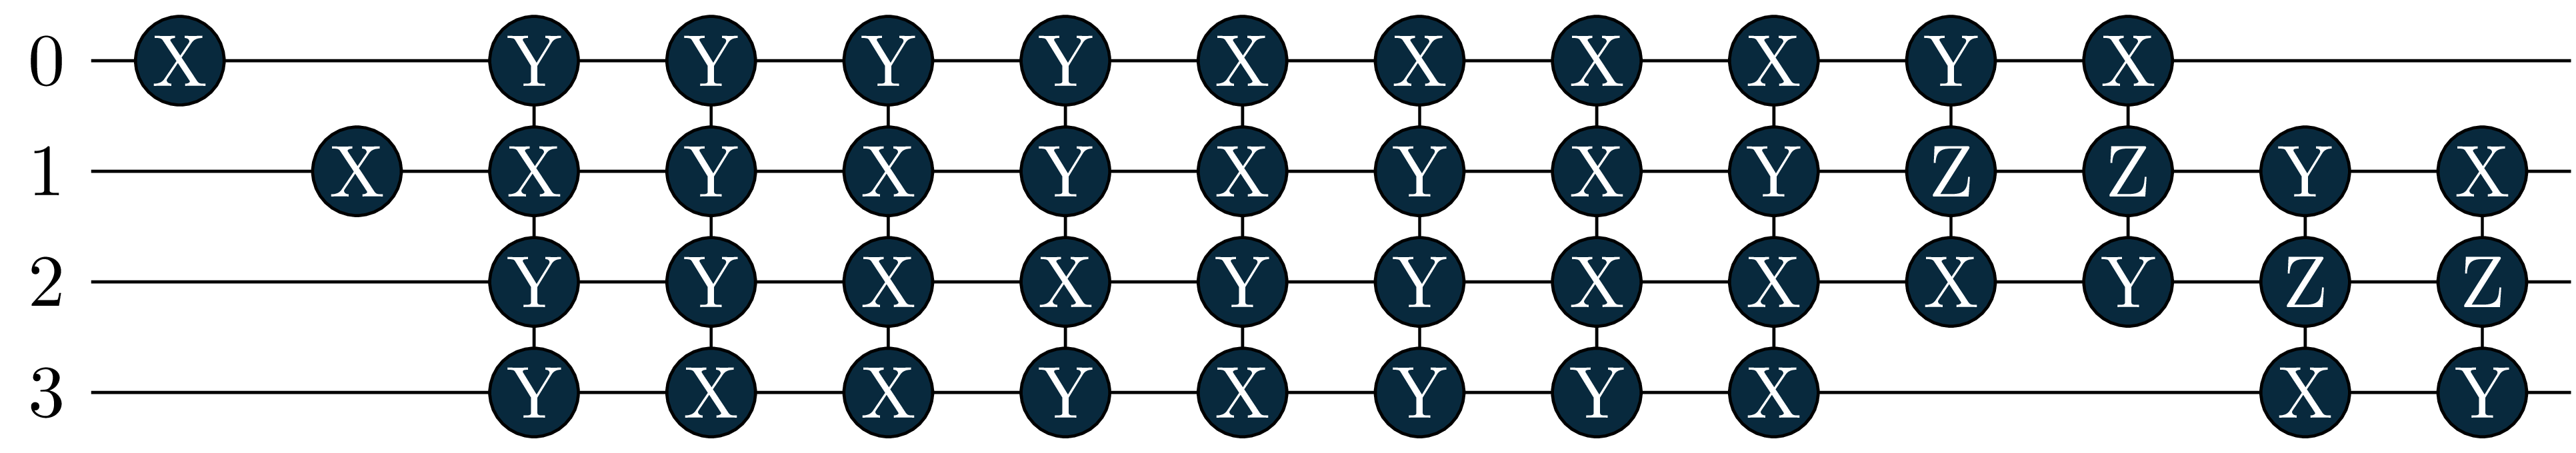

In [13]:
show(circuits[2])